# 출처
[탄소 배출량](https://www.icos-cp.eu/science-and-impact/global-carbon-budget/2022)<br>
[구글트렌드_한국](https://trends.google.co.kr/trends/explore?date=all&geo=KR&q=%EC%A7%80%EA%B5%AC%EC%98%A8%EB%82%9C%ED%99%94&hl=ko)<br>
[구글트렌드_전세계](https://trends.google.co.kr/trends/explore?date=all&q=global%20warming&hl=ko)<br>
[법정동 코드](https://www.code.go.kr/stdcode/regCodeL.do)<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## OECD국가와 비국가간 탄소배출량 비율

In [2]:

data = pd.read_excel('National_Fossil_Carbon_Emissions_2022v1.0.xlsx', sheet_name='Territorial Emissions')
carbonEmission = data.iloc[10:]
carbonEmission.iloc[0,0] = 'Year'

C:\Users\STR\AppData\Local\Temp\ipykernel_21976\3005104799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carbonEmission.iloc[0,0] = 'Year'


In [3]:
header = carbonEmission.iloc[0]
carbonEmission = carbonEmission[1:]
carbonEmission.rename(columns=header, inplace=True)
carbonEmission.set_index(keys='Year', inplace=True)
carbonEmission.astype(float)
carbonEmission.fillna(0, inplace=True)


,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Asia,Central America,Europe,Middle East,North America,Oceania,South America,Bunkers,Statistical Difference,World
Year,,,,,,,,,,,,,,,,,,,,,
1850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000069,0,...,0.004014,0,48.315986,0,5.418,0,0,0,0,53.738
1851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,47.517,0,6.742,0,0,0,0,54.259
1852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,49.311,0,7.335,0,0,0,-0.0,56.646
1853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,51.022,0,8.26,0,0,0,-0.0,59.282
1854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,60.55,0,9.084,0,0,0,0,69.634


In [ ]:
# dfToJson = carbonEmission.loc[2005:,['Non-OECD','OECD','World']]
# dfToJson.to_json('carbonEmission.json')

<class 'list'>


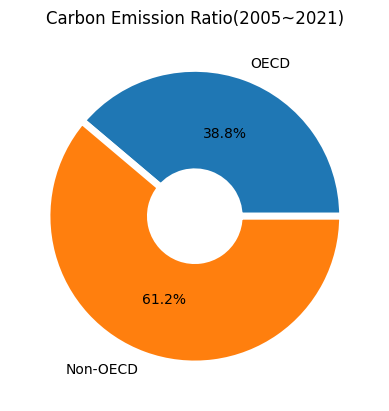

In [11]:
world = carbonEmission.loc[2005:,'World'].sum()
ratio = [carbonEmission.loc[2005:,'OECD'].sum()/world*100, carbonEmission.loc[2005:,'Non-OECD'].sum()/world*100]
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('Carbon Emission Ratio(2005~2021)')
plt.pie(ratio, labels=['OECD','Non-OECD'], autopct='%.1f%%', wedgeprops=wedgeprops)
plt.show()

## OECD국가와 비국가의 연간 탄소배출량 그래프

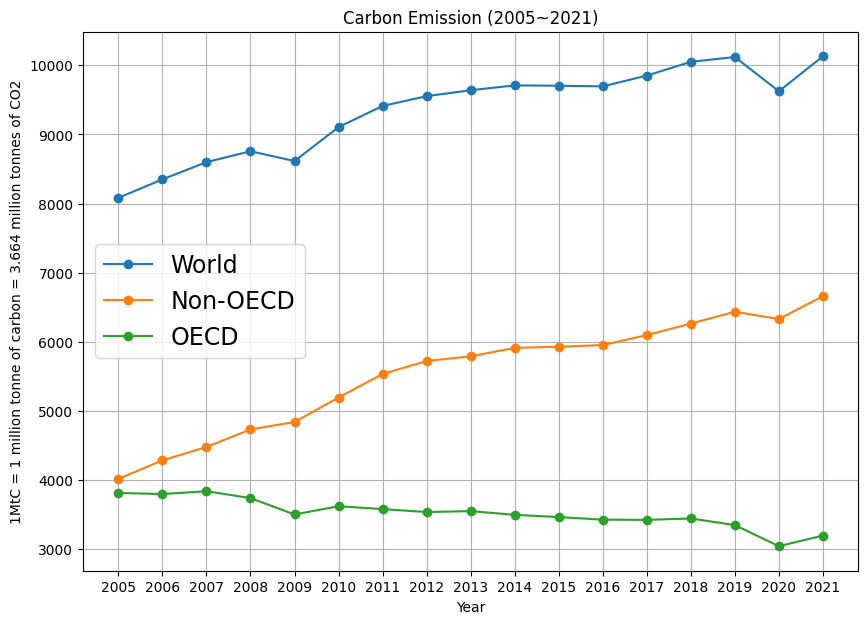

In [42]:
fig, ax = plt.subplots(figsize=(10,7))
year = np.arange(2005,2022,1)
ax.plot(year, carbonEmission.loc[2005:,'World'], marker='o', label='World')
ax.plot(year, carbonEmission.loc[2005:,'Non-OECD'], marker='o', label='Non-OECD')
ax.plot(year, carbonEmission.loc[2005:,'OECD'], marker='o', label='OECD')
ax.set_xticks(year)
ax.set_xlabel('Year')
ax.set_ylabel('1MtC = 1 million tonne of carbon = 3.664 million tonnes of CO2')
ax.grid(True)
ax.legend(fontsize=17)
ax.set_title('Carbon Emission (2005~2021)')
plt.show()

## 구글트렌드로 알아보는 지구온난화 관심도

In [7]:
def csvToTrendDF(name):
    df = pd.read_csv(name)[1:]
    df.rename(columns={'카테고리: 모든 카테고리':'Trend'}, inplace=True)
    df = df.astype(int)
    # df.to_json(name[:-3]+'json')
    return df

searchKor = csvToTrendDF('globalWarming_kor.csv')
searchGlo = csvToTrendDF('globalWarming_glo.csv')

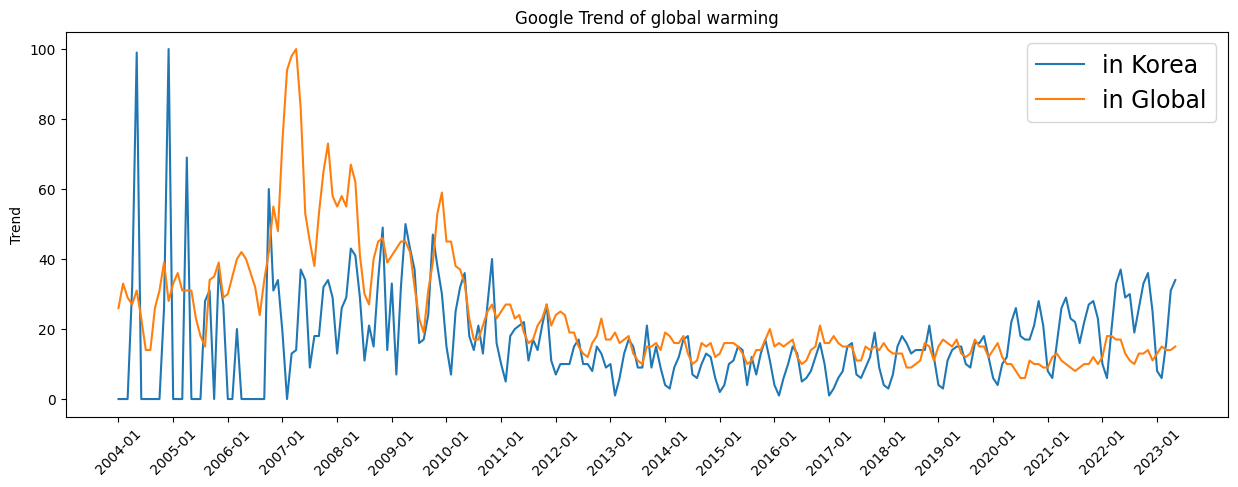

In [81]:
fig, ax2 = plt.subplots(figsize=(15,5))
ax2.set_title('Google Trend of global warming')
ax2.plot(searchKor.index,searchKor['Trend'], label='in Korea')
ax2.plot(searchGlo.index,searchGlo['Trend'], label='in Global')
ax2.set_xticks(np.arange(0, len(searchKor.index) + 1, 12))
ax2.tick_params(axis='x',rotation=45)
ax2.set_ylabel('Trend')
ax2.legend(loc='upper right', fontsize=17)
plt.show()

## 법정동 코드 CSV파일 작성

In [25]:
code_data = pd.read_csv('법정동코드 전체자료.txt', sep="\t", engine='python', encoding="cp949")
code = code_data
code = code[code["폐지여부"]=="존재"].drop('폐지여부', axis=1)
code.rename(columns={'법정동코드':'areaNo', '법정동명':'address_name'}, inplace=True)
code_csv = code.to_csv('areaNo.csv', index=False)